<span style="color: rgb(0, 13, 15); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Roboto, &quot;Helvetica Neue&quot;, Arial, &quot;Noto Sans&quot;, &quot;Liberation Sans&quot;, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 15px; background-color: rgb(204, 230, 234);">На сликата подолу е прикажан дел од ЕР дијаграмот на база на податоци за водење евиденција за ковид-19.</span>

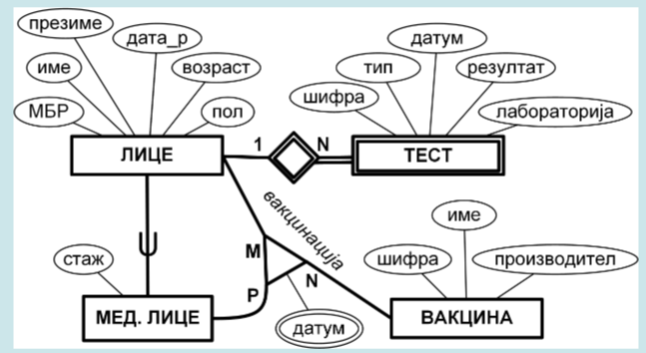<span style="color: rgb(0, 13, 15); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Roboto, &quot;Helvetica Neue&quot;, Arial, &quot;Noto Sans&quot;, &quot;Liberation Sans&quot;, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 15px; background-color: rgb(204, 230, 234);"><br></span>

| Релационата база е дефинирана преку следните релации:Lice(<u>id</u>, mbr, ime, prezime, data\_r, vozrast, pol)  
Med\_lice(<u>id</u>\*, staz)Test(<u>id</u>\*, <u>shifra</u>, tip, datum, rezultat, laboratorija)  
Vakcina(<u>shifra</u>, ime, proizvoditel)  
Vakcinacija(<u>id\_lice</u>\*, <u>id\_med\_lice</u>\*, <u>shifra\_vakcina</u>\*)  
Vakcinacija\_datum(<u>id\_lice</u>\*, <u>id\_med\_lice</u>\*, <u>shifra\_vakcina</u>\*, <u>datum</u>)Да се напишат соодветните DDL изрази за ентитетните множества „ВАКЦИНАЦИЈА“ и „ТЕСТ“, како и за евентуалните релации кои произлегуваат од истите, доколку треба да бидат исполнети следните барања:  
- Mедицинските лица не може себеси да си даваат вакцина.
    
- Лабораторијата „lab-abc“ прави само „seroloshki“ тестови.
    
- Не сакаме да водиме информации за тестовите на лицата кои се избришани од базата на податоци.
    

  Забелешка: Табелите и атрибутите потребно е да ги креирате со ИСТИТЕ ИМИЊА и ИСТИОТ РЕДОСЛЕД како што е дадено во релациониот модел. За табелите кои веќе се креирани претпоставете дека примарните клучеви се од тип INT. За надворешните клучеви за кои не е наведено ограничување за референцијален интегритет се претпоставува каскадна промена, додека при бришење информациите треба да останат зачувани во базата на податоци. Конкретните вредности за датум дефинирајте ги како стринг (на пример "2021-08-25"). |
| --- |

In [ ]:
CREATE TABLE Vakcinacija(
    id_lice int, 
    id_med_lice int, 
    shifra_vakcina int,
    primary key (id_lice, id_med_lice, shifra_vakcina),
    foreign key (id_lice) references Lice (id) on update cascade on delete SET DEFAULT, 
    foreign key (id_med_lice) references Med_lice (id) on update cascade on delete SET DEFAULT,
    foreign key (shifra_vakcina) references Vakcina (shifra) on update cascade on delete SET DEFAULT,
    check (id_lice != id_med_lice)
);

CREATE TABLE Vakcinacija_Datum(
    id_lice int, 
    id_med_lice int, 
    shifra_vakcina int, 
    datum date,
    primary key (id_lice, id_med_lice, shifra_vakcina, datum),
    foreign key (id_lice, id_med_lice, shifra_vakcina) references Vakcinacija (id_lice, id_med_lice, shifra_vakcina) 
    on update cascade on delete set null
    --foreign key (id_lice) references Lice (id) on update cascade on delete set null, 
    --foreign key (id_med_lice) references Med_lice (id) on update cascade on delete set null,
    --foreign key (shifra_vakcina) references Vakcina (shifra) on update cascade on delete set null
);


CREATE TABLE Test(
    id int, 
    shifra int, 
    tip text, 
    datum date, 
    rezultat text, 
    laboratorija text,
    primary key (id, shifra),
    foreign key (id) references Lice (id) on update cascade on delete cascade,
    check (laboratorija != 'lab-abc' or tip = 'seroloshki')
);